# Simple MNIST convnet
Tweaked version of the code from https://keras.io/examples/vision/mnist_convnet/

## Setup

In [1]:
%load_ext tensorboard
%matplotlib inline

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime, os

## Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 3s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


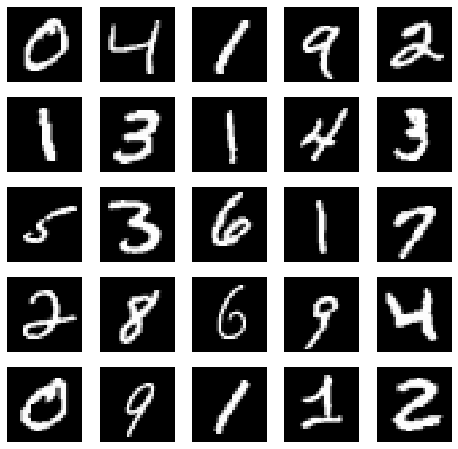

In [4]:
def plot_examples():
    fig = plt.figure(figsize=(8, 8))
    rows, columns = 5, 5
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_axis_off()
        plt.imshow(x_train[i], cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.show()

plot_examples()

## Build the model

In [5]:
def create_model():
    return tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ])

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

In [6]:
# Remove any old training logs
!rm -rf ./logs

In [7]:
def train_model(model):
    batch_size = 8
    epochs = 7
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    model.fit(x_train,
              y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3,
              callbacks=[tensorboard_callback])

In [8]:
%%capture
%tensorboard --logdir ./logs --reload_interval 3 --reload_multifile True --host 0.0.0.0 --port 6006

In [9]:
train_model(model)

Epoch 1/7
   1/5250 [..............................] - ETA: 1s - loss: 2.3034 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5250/5250 [==============================] - 67s 13ms/step - loss: 0.1900 - accuracy: 0.9413 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 2/7
5250/5250 [==============================] - 63s 12ms/step - loss: 0.0784 - accuracy: 0.9752 - val_loss: 0.0487 - val_accuracy: 0.9845
Epoch 3/7
5250/5250 [==============================] - 63s 12ms/step - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.0432 - val_accuracy: 0.9867
Epoch 4/7
5250/5250 [==============================] - 63s 12ms/step - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0484 - val_accuracy: 0.9864
Epoch 5/7
5250/5250 [==============================] - 6

## Save the model

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.029988467693328857
Test accuracy: 0.9902999997138977


In [11]:
saved_model_path = model.save("./mnist/1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./mnist/1/assets


In [12]:
import subprocess
subprocess.run(["zip -r ./mnist.zip ./mnist"],shell=True)

CompletedProcess(args=['zip -r ./mnist.zip ./mnist'], returncode=0)

## Download model

Navigate back to homepage and select the 'mnist.zip' file for download.